We shall first try to create a very simple solver that tries to solve the differential equation \\
$\dot{x} = x$, subject to the boundary condition $x(0) = 1$ \\
We will be using a genetic algorithm to code the solver.


In [ ]:
#Import all the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

We shall consider polynomials of degree $n$ and of the form $\sum_{i = 0}^n a_{i}x^i$. Currently we shall not be using an optimal way to compute this polynomial. \\
Further, note that our coefficient vector shall be containing the coefficients in the order in which they appear in the summation. \\
Our coefficient vector is therefore $[a_0 ~ a_1 ~ \dots a_n]$.   

In [ ]:
#Define all the constants
degree = 10
num_iters = 100
population = 100
coefficients = np.zeros((population, (degree + 1)))
fitness_vector = np.zeros(population)
center = 0
sigma = 5

min_range = center - sigma
max_range = center + sigma

c_min = -1
c_max = 1
x_of_0 = 1

mutation_rate = 0.25
mutation_std_dev = 0.5
selection_exponent = 10
n_crosses = 50
n_samples = int(max_range - min_range)*10
epsilon = 1e-8


We shall consider the error to be the quantity $̇|\dot{x} - x|$ and then aim for our final solution to be able to minimise this error.  

In [ ]:
#Function to calculate error
def calculate_error(input_array, member, x):
  value = 0
  value_d1 = 0
  for i in range(degree + 1):
    value += input_array[member][i]*(x**i)
  for i in range(1, degree + 1):
    value_d1 += input_array[member][i]*i*(x**(i - 1))
  return np.abs(value - value_d1)

In [ ]:
def compute_solution(x):
  global coefficients, fitness_vector
  best_member = np.argmax(fitness_vector)
  solution = 0
  for i in range(degree + 1):
    solution += coefficients[best_member][i]*(x**i)
  return solution

In [ ]:
def true_solution(x):
  return np.exp(x)

The fitness function that we shall define should be such that it prefers those members which have a smaller error. We want to have some kind of monotonically decreasing transformation which promotes lower values. We can first compute the exponential of the negative error and then transform it. Hence we can have some function of the form $e^{-ax}$, where $a$ is a hyperparameter which will play the role of a selection exponent.

In [ ]:
#Calculate fitness value
def calculate_fitness_value(input_array, member, number_of_samples):
  fitness_value = 0
  for i in range(n_samples):
    x = center - 2*sigma + i/(n_samples - 1)*(4*sigma)
    error = calculate_error(input_array,member,x)
    fitness_value += np.exp(-error)
  return fitness_value/n_samples

In [ ]:
#Initialise the population
def initialize_population():
  global coefficients
  for i in range(population):
    for j in range(degree + 1):
      coefficients[i][j] = np.random.uniform(c_min, c_max)

In [ ]:
#Calculate the fitness vector
def calculate_fitness_vector():
  global coefficients, fitness_vector
  for i in range(population):
    fitness_vector[i] = calculate_fitness_value(coefficients, i, n_samples)

In [ ]:
#Fix constants
def fix_constants(x_of_0):
  global coefficients
  for i in range(population):
    coefficients[i][0] = x_of_0

In [ ]:
#Roulette Selection function
def roulette_selection_function():
  global coefficients, best_fitness_values, fitness_vector
  selection_probabilities = np.zeros(population)
  exp_fitness = np.zeros(population)
  for i in range(population):
    exp_fitness[i] = fitness_vector[i]**selection_exponent
  for i in range(population):
    selection_probabilities[i] = exp_fitness[i]/np.sum(exp_fitness)
  sampled_indices = np.random.choice(len(selection_probabilities), population, p = selection_probabilities)
  temp = np.zeros((population, (degree + 1)))
  for i in range(population):
    temp[i] = coefficients[sampled_indices[i]]
  coefficients = temp.copy()


In [ ]:
#Crossover operation
def crossover_function():
  global coefficients
  for i in range(n_crosses):
    temp = coefficients.copy()
    i1 = np.random.randint(0, population)
    i2 = np.random.randint(0, population)
    splitting_point = np.random.randint(1, degree)
    for j in range(0, splitting_point):
      temp[i1][j] = coefficients[i1][j]
      temp[i2][j] = coefficients[i2][j]
    for j in range(splitting_point, degree + 1):
      temp[i1][j] = coefficients[i2][j]
      temp[i2][j] = coefficients[i1][j]
    fitness_old_1 = calculate_fitness_value(coefficients, i1, n_samples)
    fitness_old_2 = calculate_fitness_value(coefficients, i2, n_samples)
    fitness_new_1 = calculate_fitness_value(temp, i1, n_samples)
    fitness_new_2 = calculate_fitness_value(temp, i2, n_samples)
    if fitness_new_1 > fitness_old_1:
      coefficients[i1] = temp[i1]
    if fitness_new_2 > fitness_old_2:
      coefficients[i2] = temp[i2]

In [ ]:
#Mutation function
def mutation_function():
  global coefficients
  for i in range(population):
    for j in range(degree + 1):
      sampled_p = np.random.uniform(0,1)
      if sampled_p < mutation_rate:
        coefficients[i][j] += np.random.uniform(coefficients[i][j] - mutation_std_dev, coefficients[i][j] + mutation_std_dev)

In [ ]:
start_time = time.time()
best_fitness_values = []
average_fitness_values = []
iter_list = []
initialize_population()
for i in range(num_iters):
  fix_constants(1)
  iter_list.append(i)
  calculate_fitness_vector()
  best_fitness_values.append(np.max(fitness_vector))
  average_fitness_values.append(np.mean(fitness_vector))
  print("Iteration: ", i, " Max Fitness: ", best_fitness_values[i], "Average Fitness: ", average_fitness_values[i] )
  print("Best solution:", coefficients[np.argmax(fitness_vector)])
  roulette_selection_function()
  crossover_function()
  mutation_function()
end_time = time.time()
print("Runtime:", end_time - start_time)


Iteration:  0  Max Fitness:  0.07200005231551826 Average Fitness:  0.035956499089152986
Best solution: [ 1.          0.80448813  0.7534318   0.35415384  0.10183835 -0.25484694
  0.3848099   0.33304216 -0.74719082  0.38318104 -0.26374301]
Iteration:  1  Max Fitness:  0.07864316657642165 Average Fitness:  0.05954748813676674
Best solution: [ 1.          0.86436676  0.3432102   0.43982059  0.55508968 -0.7283524
  0.11650714  0.9072393  -0.74719082  0.38318104 -0.26374301]
Iteration:  2  Max Fitness:  0.08119710781230798 Average Fitness:  0.0627741697525021
Best solution: [ 1.          0.86436676  0.3432102   0.43982059  0.55508968 -0.7283524
  0.11650714  0.9072393  -0.74719082  0.40900953 -0.26374301]
Iteration:  3  Max Fitness:  0.08539844019903065 Average Fitness:  0.06678049945443744
Best solution: [ 1.          1.27439107  0.3432102   0.43982059  0.55508968 -0.7283524
  0.07758203  0.33304216 -0.74719082  0.06809075  0.31937387]
Iteration:  4  Max Fitness:  0.09268563009451981 Averag

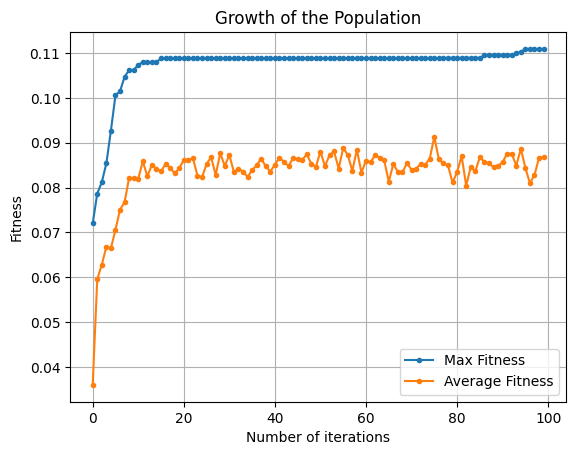

In [ ]:
plt.plot(iter_list, best_fitness_values, marker='.', linestyle='-', label = 'Max Fitness')
plt.plot(iter_list, average_fitness_values, marker='.', linestyle='-', label = 'Average Fitness')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.title('Growth of the Population')
plt.grid(True)
plt.legend()
plt.show()

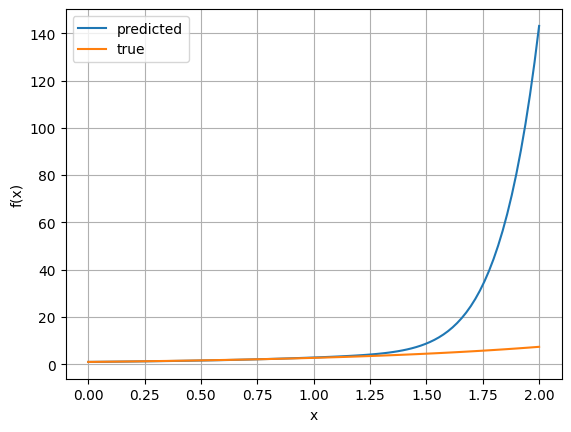

In [ ]:
x_values = np.linspace(0, 2, 100)

# Step 4: Evaluate the function
pred = compute_solution(x_values)
true = true_solution(x_values)
# Step 5: Plot the graph
plt.plot(x_values, pred, label = 'predicted')
plt.plot(x_values, true, label = 'true')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


# Benchmarking


Here, we shall be plotting the thermal profile in the plate in order to benchmark our solution obtained through the MATLAB simulations with what is obtained from the numerical solution


Reference: THERMAL STRESSES IN PLATES WITH CIRCULAR HOLES
K.S.RAO, M.N.BAPU RAO and T.ARIMAN, NUCLEAR ENGINEERING AND DESIGN i 5 (1971) 97-112. NORTH-ttOLLAND PUBLISHING COMPANY


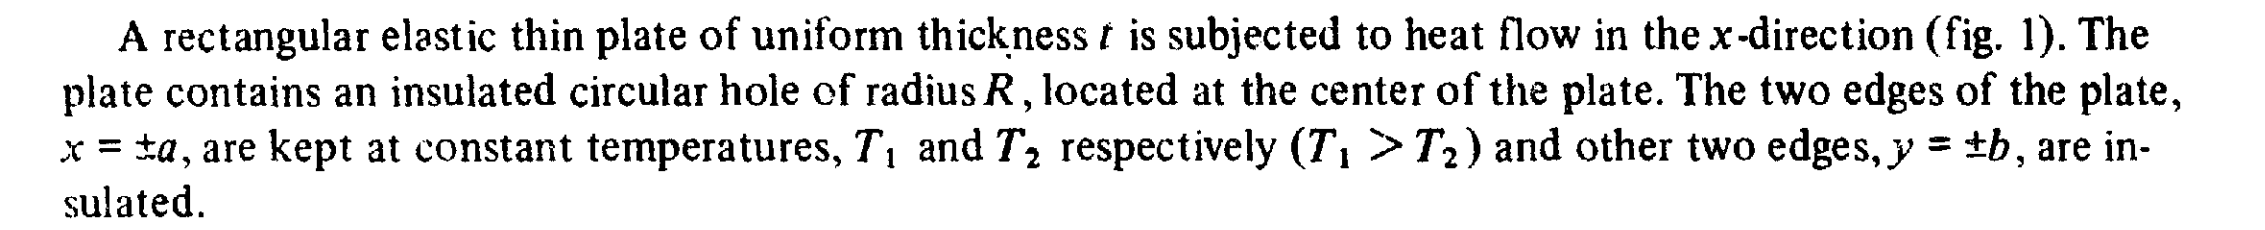

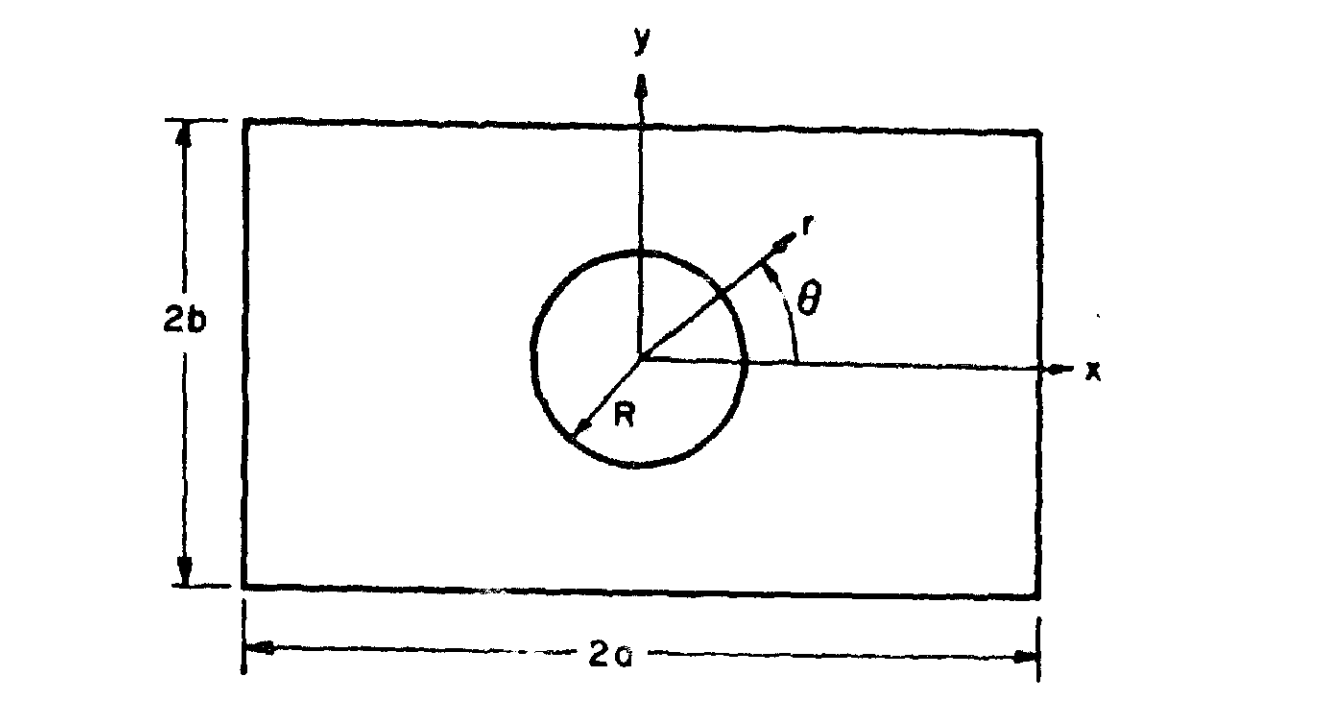

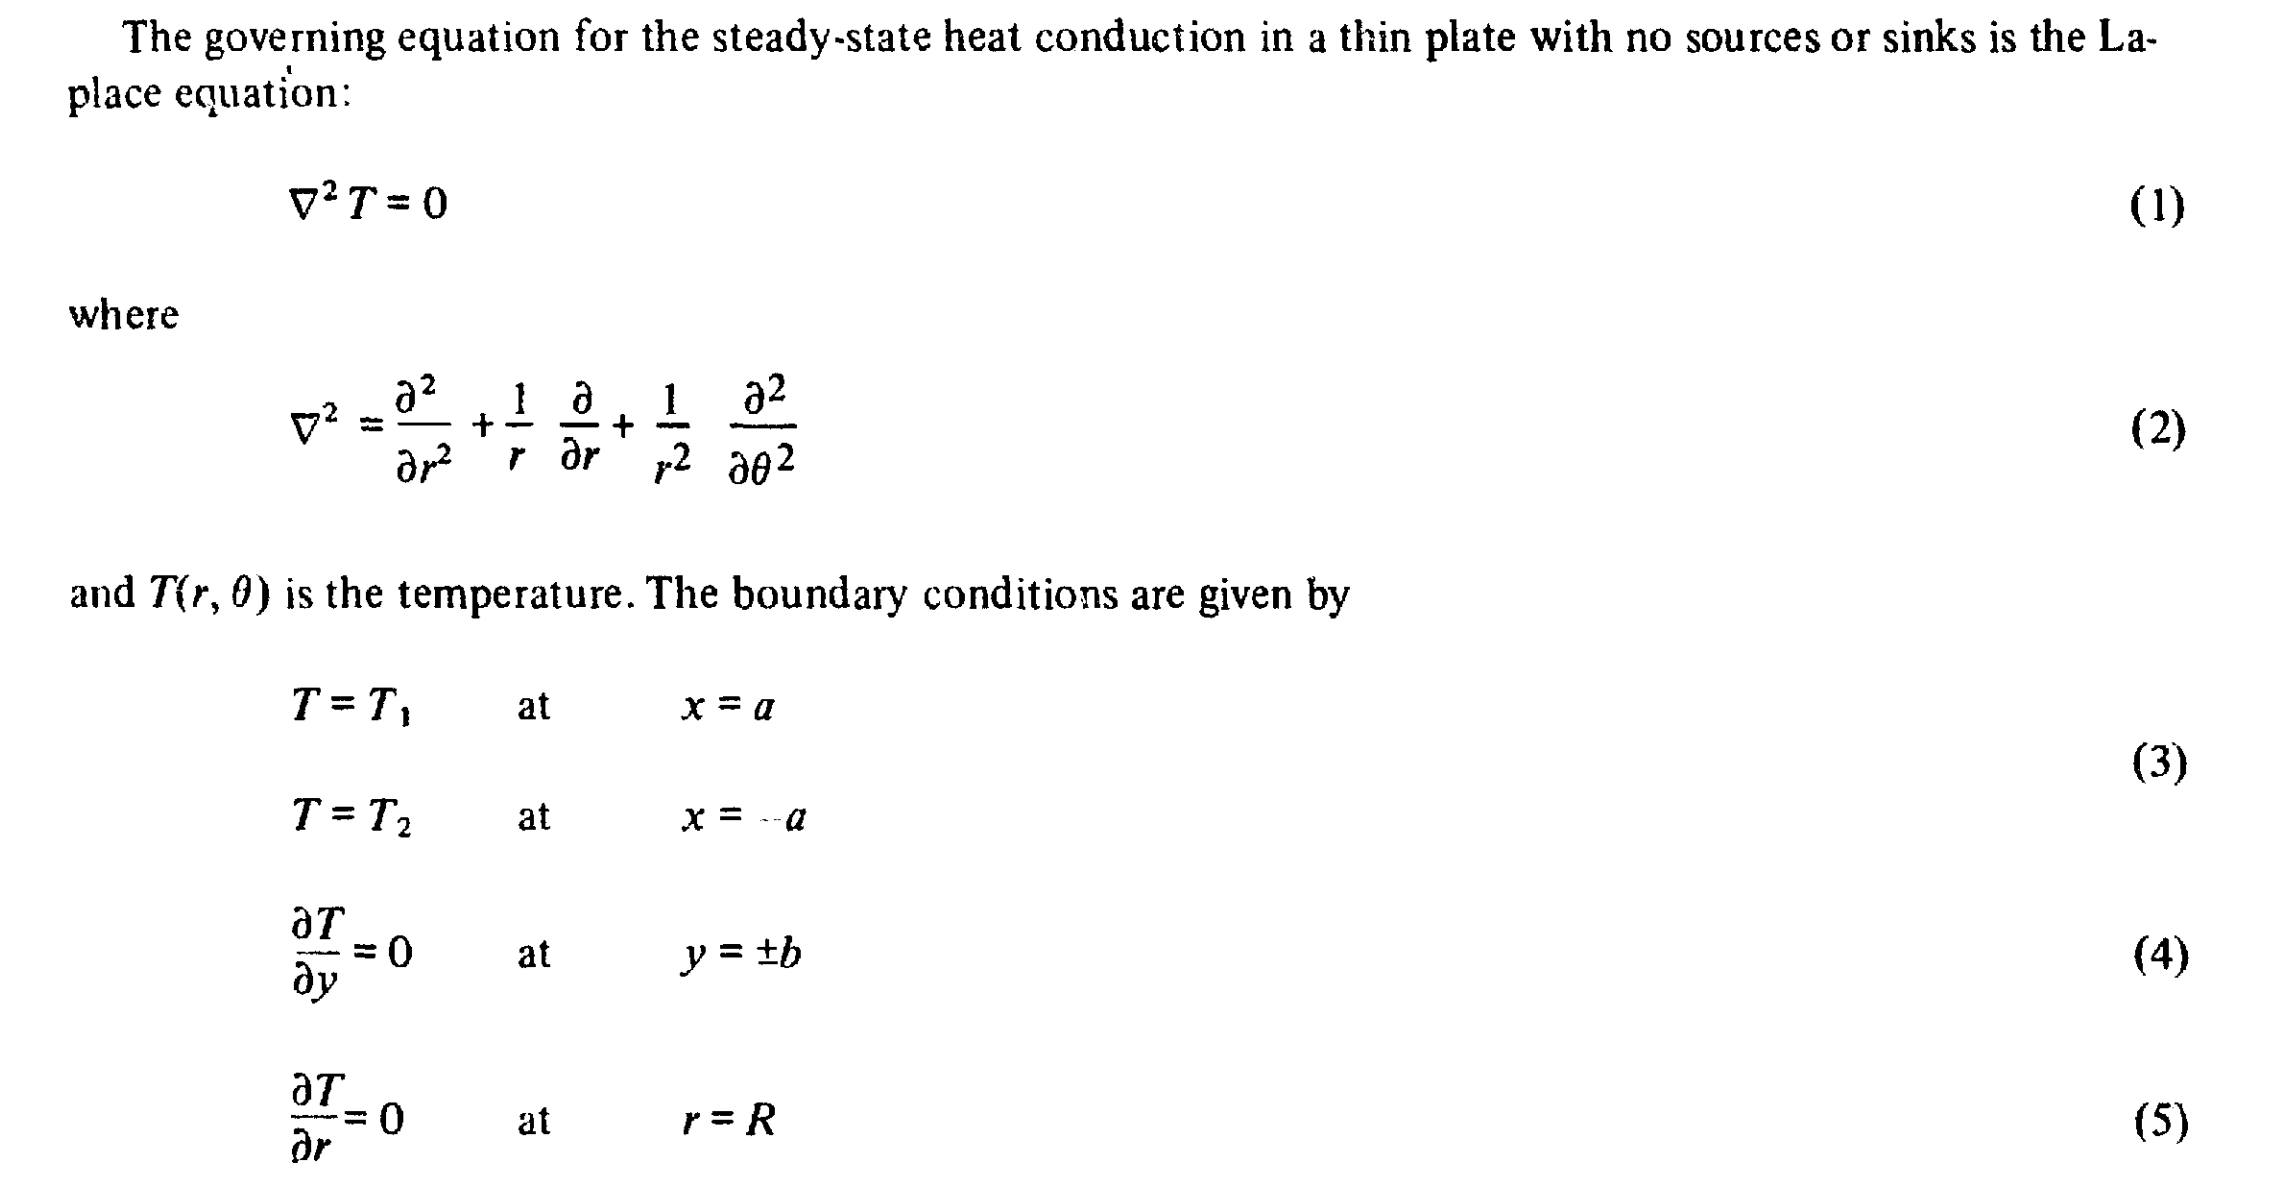

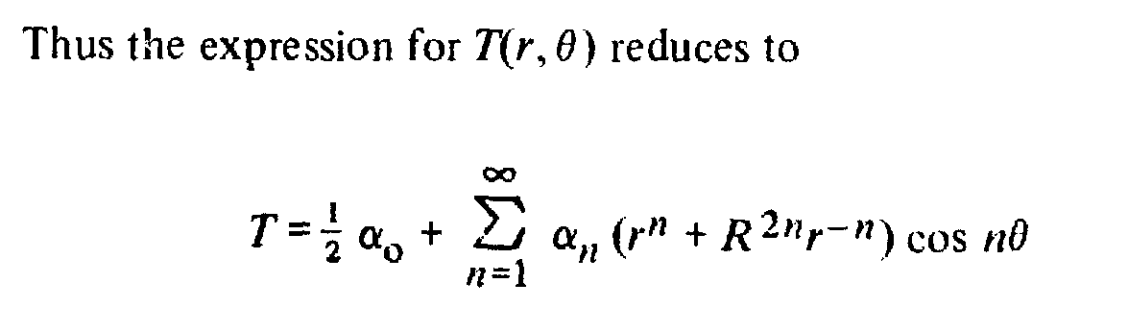

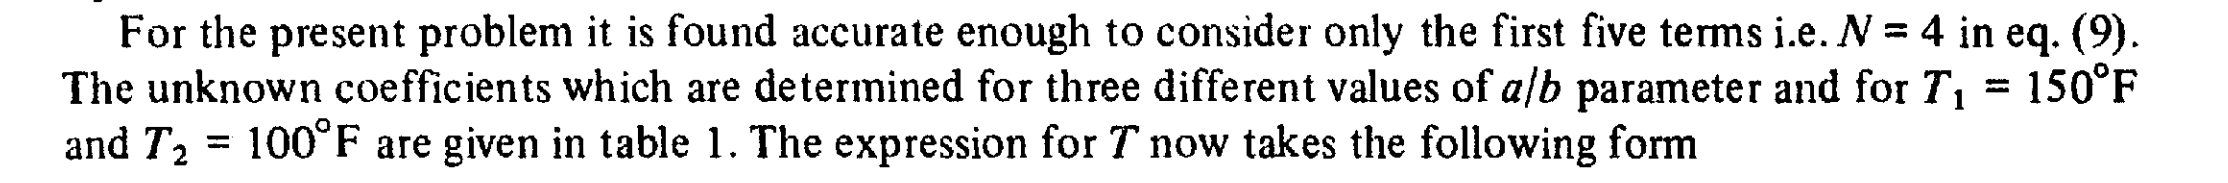

##### Defining the constants <br>
We find from Rao, Thermal stresses that the solution is given by <br>
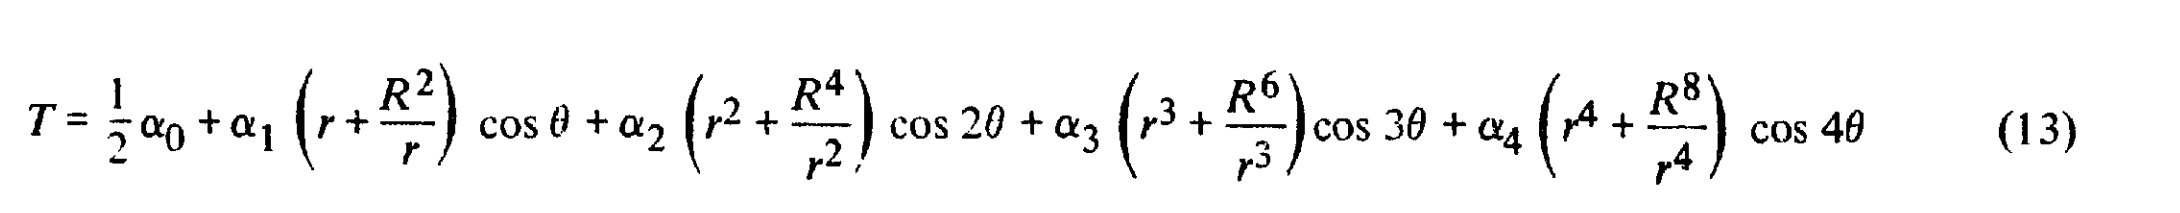

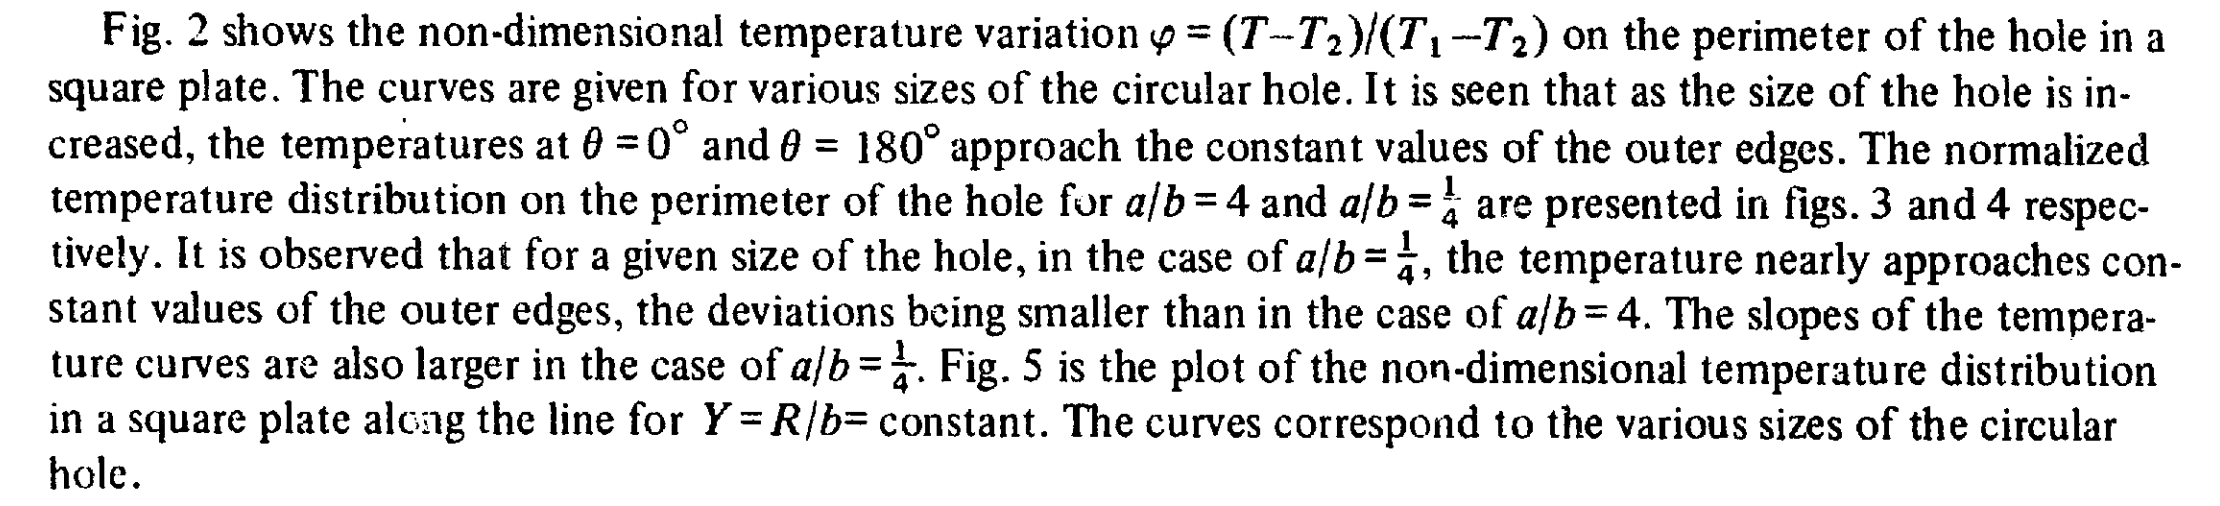

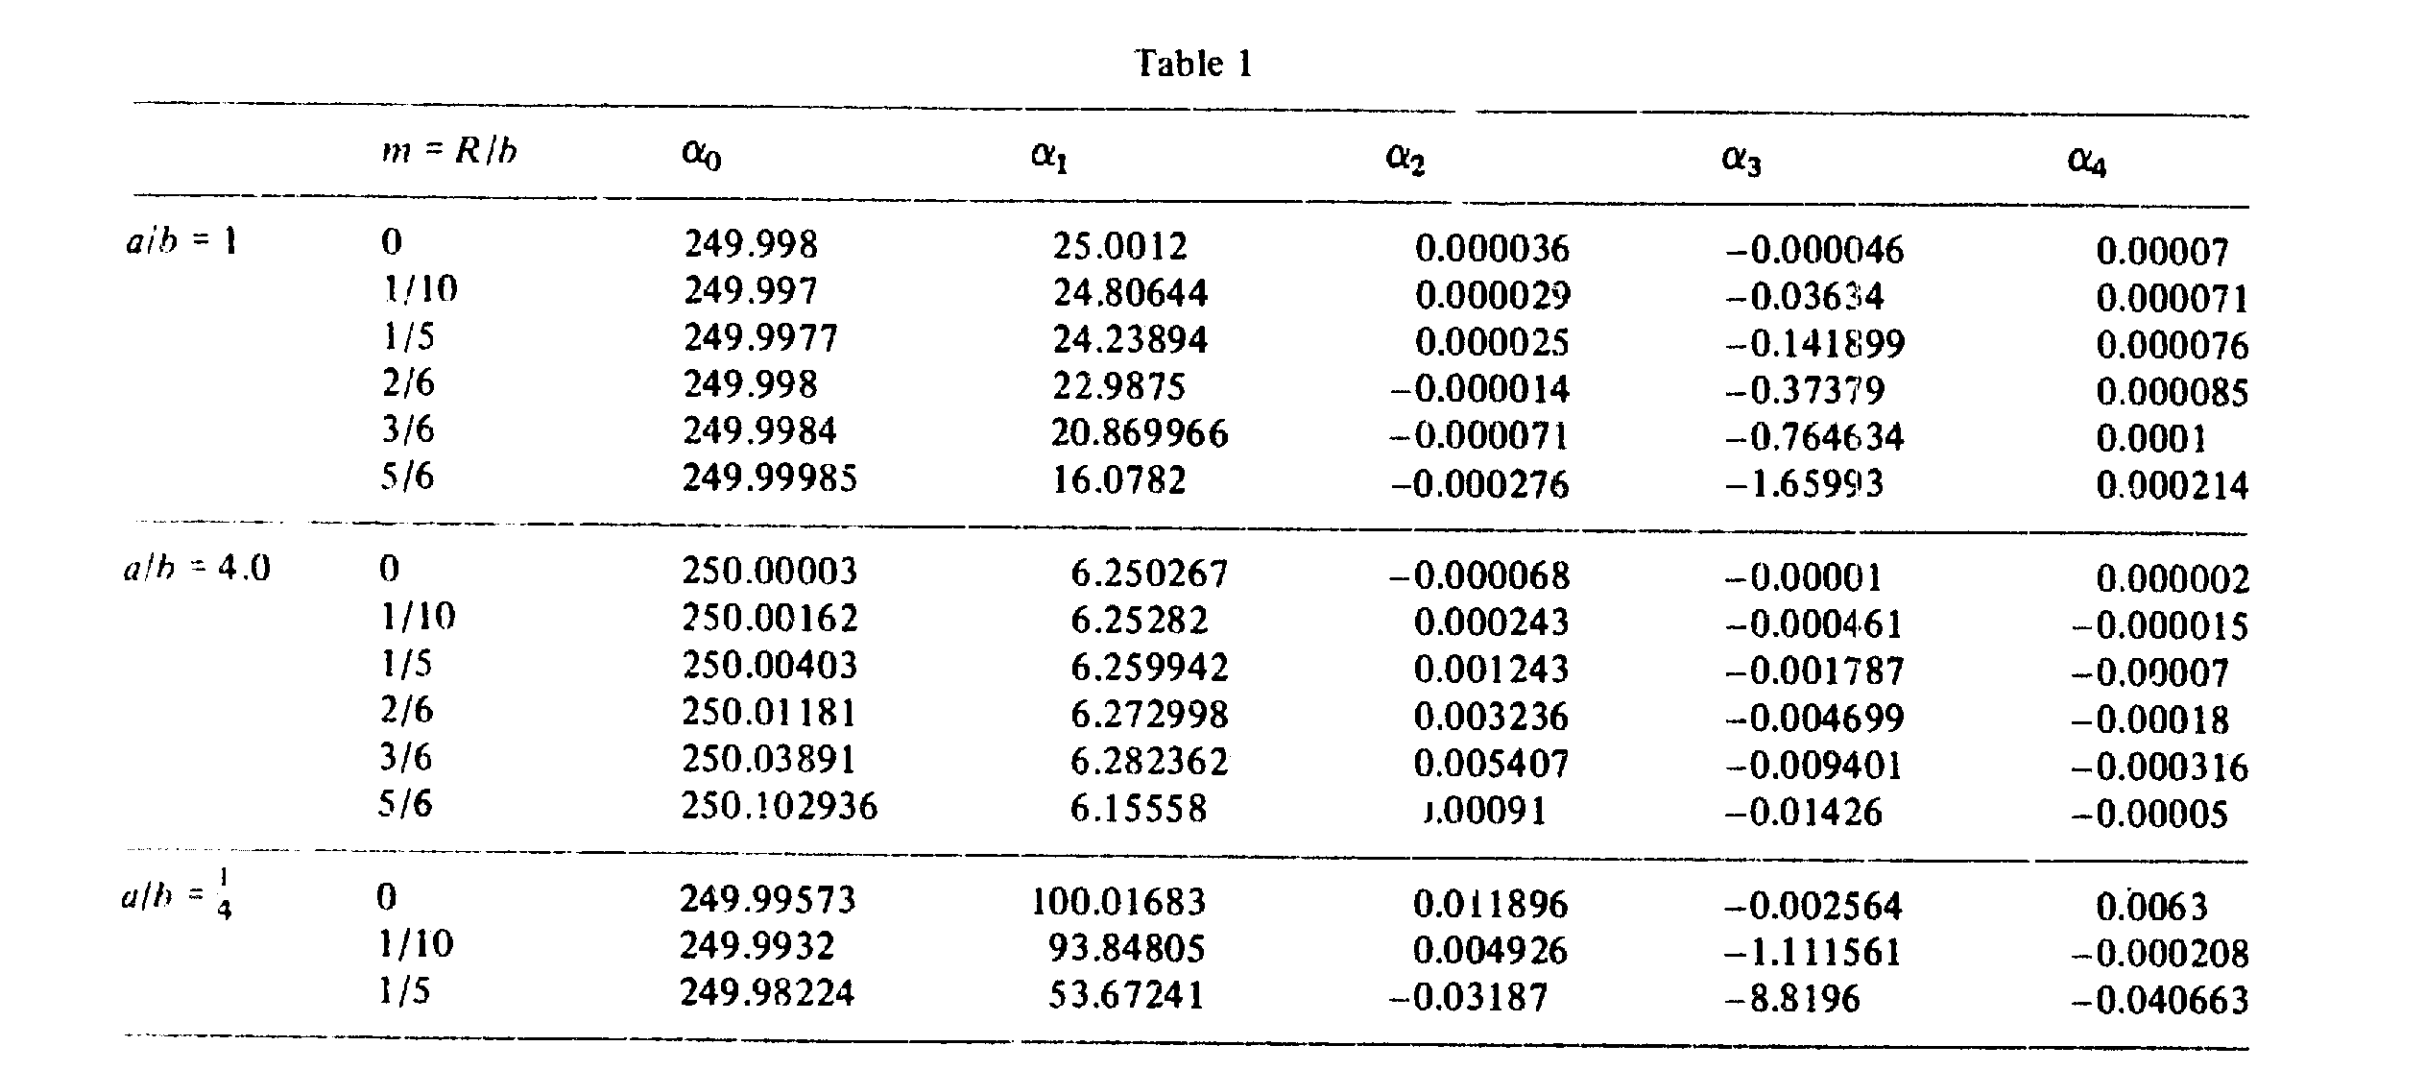

In [ ]:
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import time
np.set_printoptions(threshold=sys.maxsize)


a = 1
b = 1
R = 0.5
alpha_0 = 249.9984
alpha_1 = 20.869966
alpha_2 = -0.000071
alpha_3 = -0.764634
alpha_4 = 0.0001
T_1 = 150 #Fahrenheit, temp at x = a
T_2 = 100 #Fahrenheit, temp at x = -a

Numerically computed thermal profile according to our method


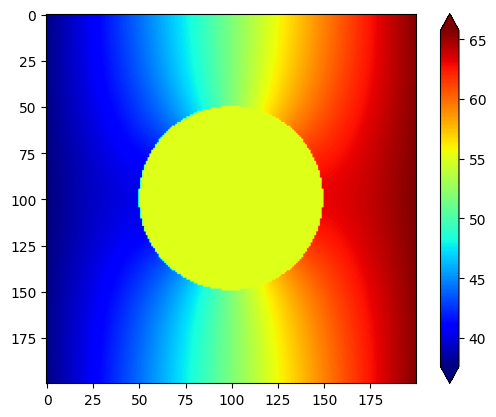

Time of execution:  0.241990327835083


In [ ]:
# def compute_cosines(x,y):
#     theta = math.atan2(y,x)
#     return math.cos(theta), math.cos(2*theta), math.cos(3*theta), math.cos(4*theta)

# def Rr_terms(r, r0):
#   t1 = r + r0**2/r
#   t2 = r**2 + r0**4/r**2
#   t3 = r**3 + r0**6/r**3
#   t4 = r**4 + r0**8/r**4
#   return t1, t2, t3, t4

# def compute_temperature_profile(x,y):
#   c1, c2, c3, c4 = compute_cosines(x,y)
#   r = math.sqrt(x**2 + y**2)
#   t1, t2, t3, t4 = Rr_terms(r, R)
#   T = 0.5*alpha_0 + alpha_1*t1*c1 + alpha_2*t2*c2 + alpha_3*t3*c3 + alpha_4*t4*c4
  # return T

print("Numerically computed thermal profile according to our method")
for i in range(20,21):
  start_time = time.time()
  N = 10*i
  x_1 = np.linspace(-a , a , N)
  y_1 = np.linspace(-b , b , N)
  x,y = np.meshgrid(x_1, y_1)
  distance_from_origin = np.sqrt(x**2 + y**2)
  temperature = 5/9*((0.5*alpha_0 + alpha_1*(np.sqrt(x**2 + y**2) + R**2/np.sqrt(x**2 + y**2) )*np.cos(np.arctan2(y,x)) + alpha_2*(np.sqrt(x**2 + y**2)**2 + (R**2/np.sqrt(x**2 + y**2))**2 )*np.cos(2*np.arctan2(y,x)) + alpha_3*(np.sqrt(x**2 + y**2)**3 + (R**2/np.sqrt(x**2 + y**2))**3)*np.cos(3*np.arctan2(y,x)) + alpha_4*(np.sqrt(x**2 + y**2)**4 + (R**2/np.sqrt(x**2 + y**2))**4 )*np.cos(4*np.arctan2(y,x))) - 32)
  temperature_modified =  np.where(distance_from_origin > R, temperature, 55)
  #plt.contourf(x, y, temperature_modified, cmap = 'jet' )
  plt.imshow(temperature_modified, cmap = 'jet' )
  plt.colorbar(extend='both')
  #plt.clim(42, 66);
  plt.show()
  end_time = time.time()
  print("Time of execution: ", end_time - start_time)


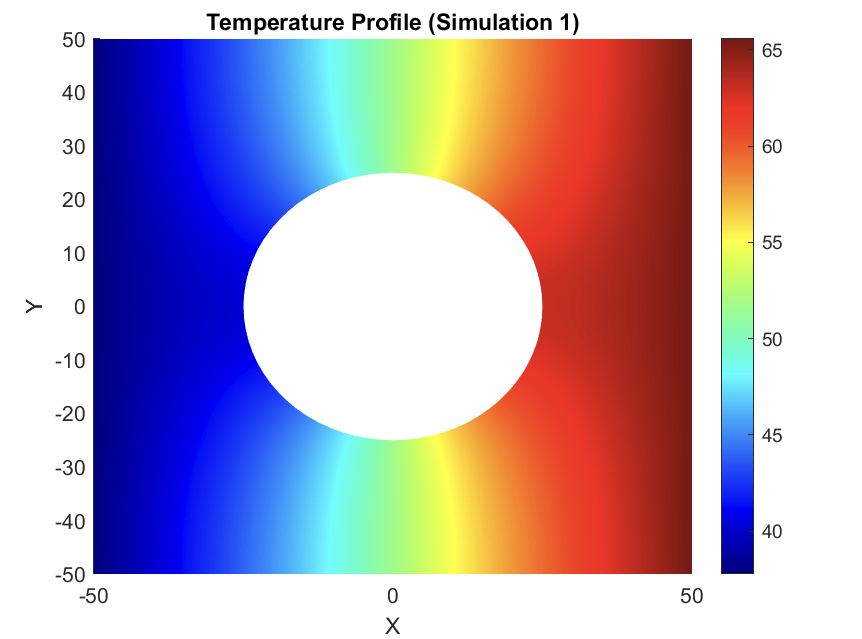

### Circle detection using Hough Transform
https://github.com/chewbacca89/OpenCV-with-Python/blob/master/Lecture%204.7%20-%20Circle%20Detection%20using%20Hough%20Cirlces.ipynb

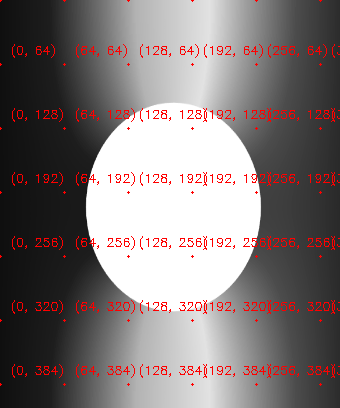

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load the image and convert it to grayscale
# Load and resize the image
image = cv2.imread('/content/TemperatureProfile_1.png')
new_width = 512
new_height = 512
resized_image = cv2.resize(image, (new_width, new_height))
cropped_image = resized_image[40:448, 60:400]
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Create an empty list to store points
points = []

# Define the interval between points (e.g., every 50 pixels)
interval = 64

# Create points at regular intervals
for y in range(0, gray.shape[0], interval):
    for x in range(0, gray.shape[1], interval):
        points.append((x, y))

# Create an image to display the points
image_with_points = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

for point in points:
    cv2.circle(image_with_points, point, 1, (0, 0, 255), -1)  # Red circles at points
    # Add text labels at each point location
    cv2.putText(image_with_points, f'({point[0]}, {point[1]})', (point[0] + 10, point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)

# Display the image with points

# Display the image with points
cv2_imshow(image_with_points)

# Save the image with points
cv2.imwrite('image_with_points.jpg', image_with_points)

cv2.waitKey(0)
cv2.destroyAllWindows()





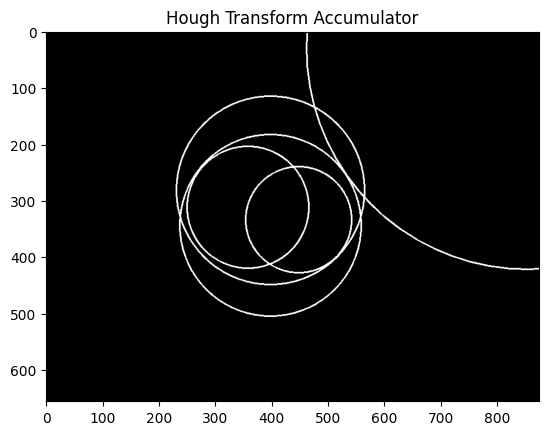

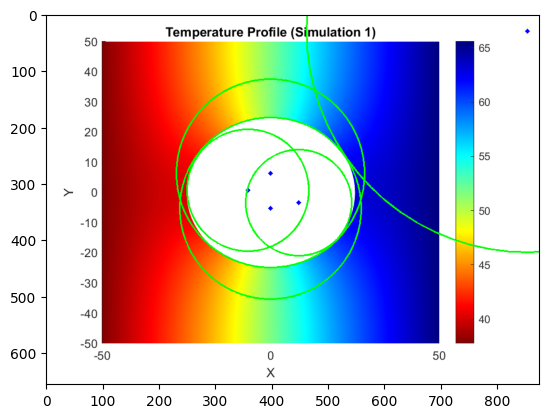

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/TemperatureProfile_1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur and edge detection if needed
# blur = cv2.GaussianBlur(gray, (9, 9), 2)
# edges = cv2.Canny(blur, 50, 150)

# Perform the Hough Circle Transform
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=100, param2=30, minRadius=0, maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))

    # Create an accumulator matrix to visualize it
    accumulator = np.zeros(gray.shape, dtype=np.uint8)

    for i in circles[0, :]:
        cv2.circle(accumulator, (i[0], i[1]), i[2], 255, 2)

    # Display the accumulator matrix
    plt.imshow(accumulator, cmap='gray')
    plt.title("Hough Transform Accumulator")
    plt.show()

    # Draw detected circles on the original image
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

    # Display the image with detected circles
    plt.imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


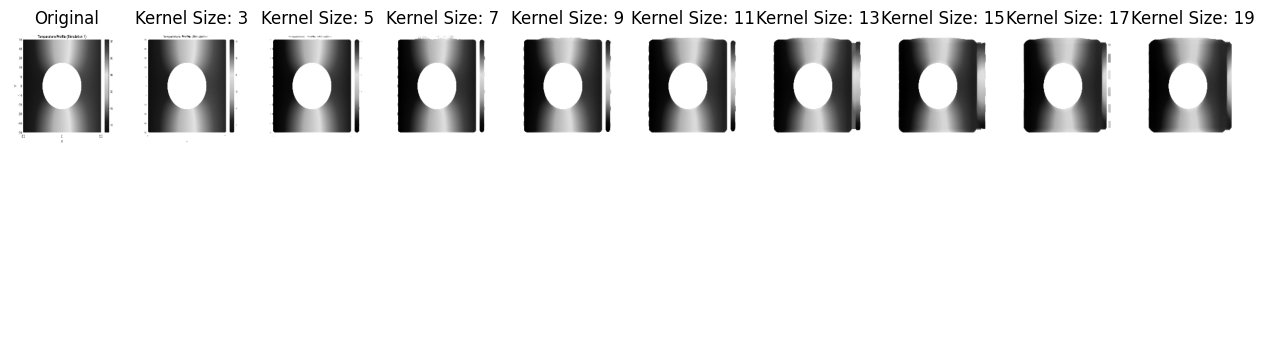

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load and resize the image
image = cv2.imread('/content/TemperatureProfile_1.png')
new_width = 200
new_height = 200
resized_image = cv2.resize(image, (new_width, new_height))
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Create a subplot with a grid layout
rows = 2  # Two rows for original and blurred images
cols = 10  # Vary the blur kernel size from 0 to 10
fig, axes = plt.subplots(rows, cols, figsize=(16, 4))

# Plot the original grayscale image
axes[0, 0].imshow(gray, cmap='gray')
axes[0, 0].set_title('Original')

# Loop through different blur kernel sizes and plot the results
for i in range(1, cols):
    kernel_size = i * 2 + 1  # Vary the kernel size from 3 to 21
    blurred_image = cv2.medianBlur(gray, kernel_size)
    axes[0, i].imshow(blurred_image, cmap='gray')
    axes[0, i].set_title(f'Kernel Size: {kernel_size}')

# Remove axis labels and ticks
for ax in axes.flatten():
    ax.axis('off')

# Adjust spacing and display the plot
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()


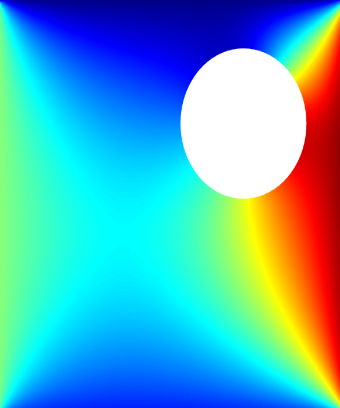

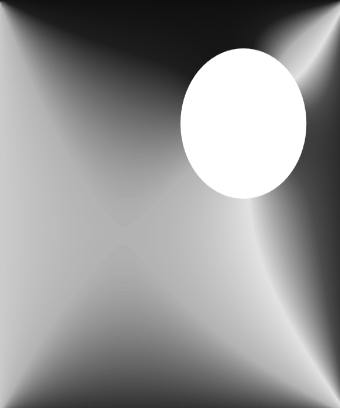

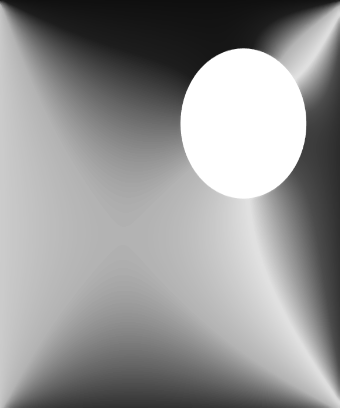

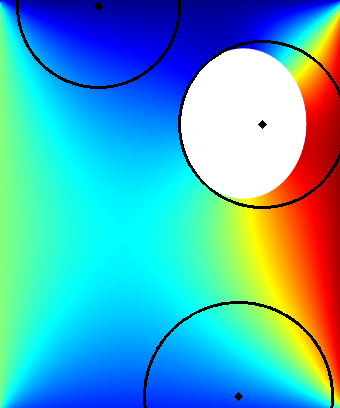

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files  # Import the files module

# Load and resize the image
image = cv2.imread('/content/TemperatureProfile_4.png')
new_width = 512
new_height = 512
resized_image = cv2.resize(image, (new_width, new_height))
x_left, x_right, y_left, y_right = 60, 400, 40, 448
cropped_image = resized_image[y_left:y_right, x_left:x_right]

# Display the original image
cv2_imshow(cropped_image)

# Convert the image to grayscale
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2_imshow(gray)

# Blur the grayscale image
blur = cv2.medianBlur(gray, 5)

# Display the blurred image
cv2_imshow(blur)

# Detect circles in the blurred image
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=0.2, minDist=200, param1=40, param2=6, minRadius=80, maxRadius=120)

if circles is not None:
    circles = np.uint16(np.around(circles))

    for i in circles[0, :]:
        # draw the outer circle
        cv2.circle(cropped_image, (i[0], i[1]), i[2], (0, 0, 0), 2)

        # draw the center of the circle
        cv2.circle(cropped_image, (i[0], i[1]), 2, (0, 0, 0), 3)

    # Display the detected circles on the color image
    cv2_imshow(cropped_image)

    # Save the color image with detected circles
    cv2.imwrite('/content/DetectedCircles_Color.png', cropped_image)

    # Save the circle coordinates to a CSV file
    circle_coordinates = circles[0, :, :2]  # Extract x, y coordinates
    np.savetxt('/content/CircleCoordinates_Color.csv', circle_coordinates, delimiter=',', header='X,Y', comments='')

    # Download the files
    files.download('/content/DetectedCircles_Color.png')
    files.download('/content/CircleCoordinates_Color.csv')

else:
    print("No circles were found.")


The current method is not able to make any good use of the fact that there is some kind of inherent structure inside the thermal profile itself. What it is only doing right now is trying to detect the circle. It also requires prior knowledge of the radius of the hole, which is not exactly how we want the code. Further, there is a large amount of false positive circles present in the image if we allow it to show circles of smaller radii.

### Otsu Thresholding

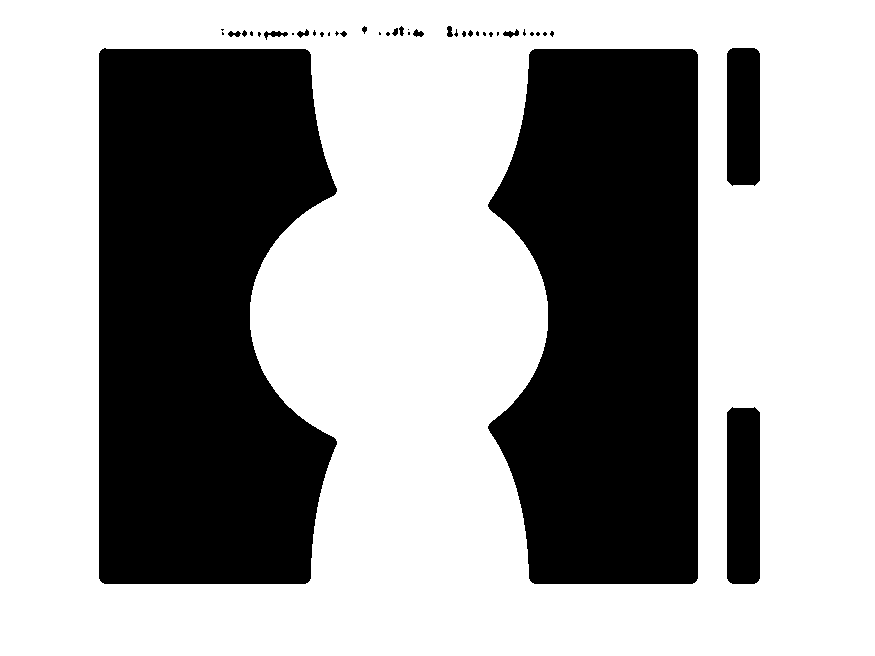

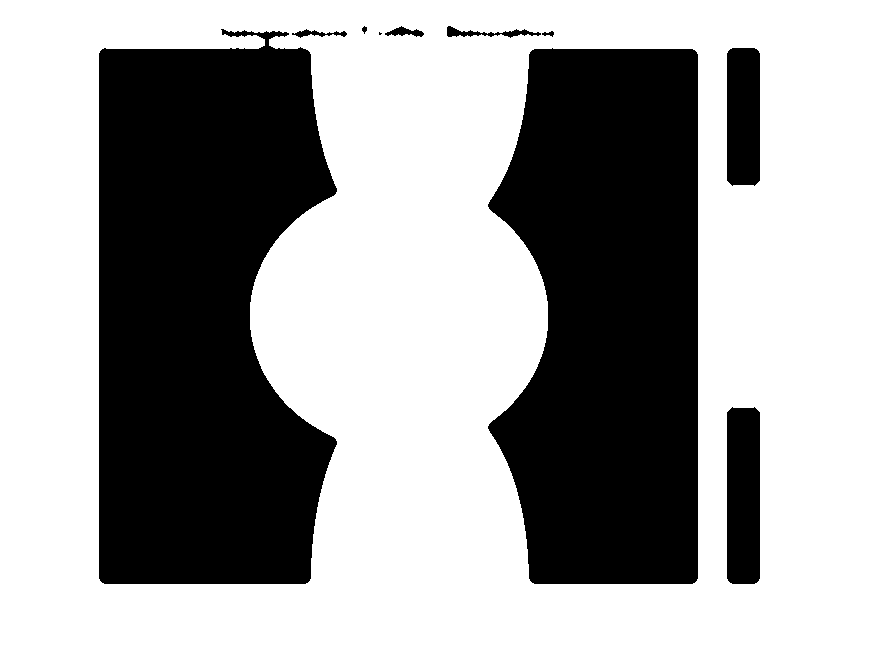

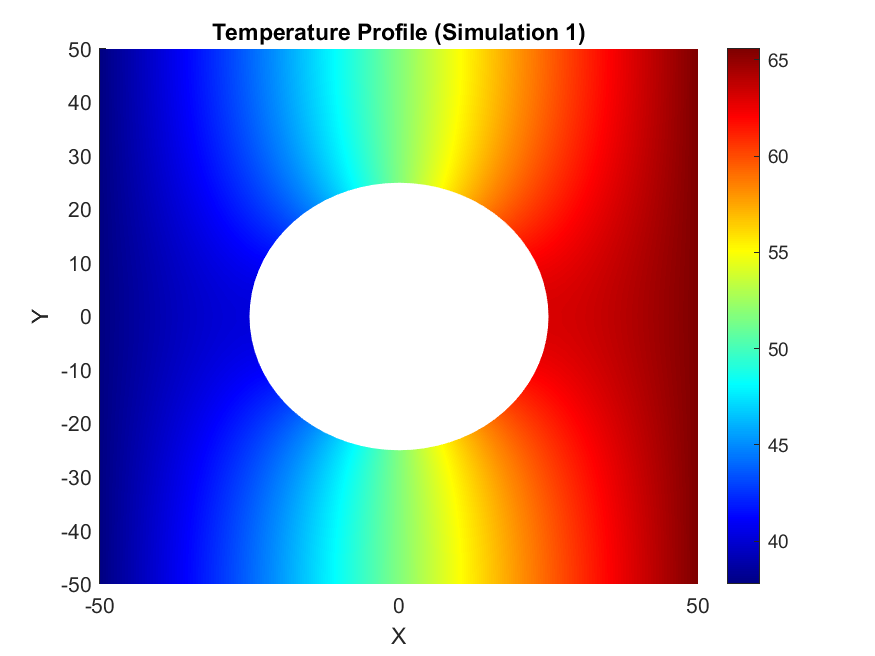

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, grayscale, median blur, Otsus hreshold
image = cv2.imread('/content/TemperatureProfile_1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 11)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Morph open
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

# Find contours and filter using contour area and aspect ratio
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    area = cv2.contourArea(c)
    if len(approx) > 5 and area > 1000 and area < 500000:
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 2)

cv2_imshow(thresh)
cv2_imshow(opening)
cv2_imshow(image)
cv2.waitKey()

### RANSAC and Hough Transform

Not working that great. RANSAC is not very well suited to detection in color images. Need to shift to YOLO based approaches


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use cv2_imshow to display images

# Load the image from the specified path
image = cv2.imread('/content/TemperatureProfile_1.png')

def data_generator(image):
    # In this function, you can use the 'image' variable instead of generating synthetic data
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Find contours in the threshold image
    contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    x_data = []
    y_data = []

    for contour in contours:
        # Calculate the center (c_x, c_y) and radius (r) of the circle from the contour
        (c_x, c_y), r = cv2.minEnclosingCircle(contour)

        x_data.append(c_x)
        y_data.append(c_y)

    return x_data, y_data

class RANSAC:
    def __init__(self, x_data, y_data, n, threshold_distance):
        self.x_data = x_data
        self.y_data = y_data
        self.n = n
        self.threshold_distance = threshold_distance
        self.d_min = 99999
        self.best_model = None

    def random_sampling(self):
        sample = []
        save_ran = []
        count = 0

        # Get three random points from data
        while True:
            ran = np.random.randint(len(self.x_data))
            if ran not in save_ran:
                sample.append((self.x_data[ran], self.y_data[ran]))
                save_ran.append(ran)
                count += 1

                if count == 3:
                    break

        return sample

    def make_model(self, sample):
        # Calculate a circle model from the sampled points

        # Fit a circle to the sampled points using a library or mathematical method
        x = [point[0] for point in sample]
        y = [point[1] for point in sample]
        A = np.column_stack((x, y, np.ones(len(sample))))
        B = np.square(x) + np.square(y)
        model = np.linalg.lstsq(A, B, rcond=None)[0]

        # The model represents (a, b, r), where (a, b) is the center and r is the radius

        return model

    def eval_model(self, model):
        d = 0
        a, b, r = model

        for i in range(len(self.x_data)):
            dis = np.sqrt((self.x_data[i] - a) ** 2 + (self.y_data[i] - b) ** 2)

            if abs(dis - r) > self.threshold_distance:
                d += abs(dis - r)

        return d

    def execute_ransac(self):
        # Find the best circle model using RANSAC
        for i in range(self.n):
            sample = self.random_sampling()
            model = self.make_model(sample)
            d_temp = self.eval_model(model)

            if self.d_min > d_temp:
                self.best_model = model
                self.d_min = d_temp

# Set the RANSAC parameters
n = 100  # Number of iterations
threshold_distance = 5.0  # Distance threshold for inlier/outlier classification

x_data, y_data = data_generator(image)

# Create a RANSAC object
ransac = RANSAC(x_data, y_data, n, threshold_distance)

# Execute the RANSAC algorithm
ransac.execute_ransac()

# Get the best model from RANSAC
a, b, r = ransac.best_model

# Show the result by drawing the detected circle
result_image = image.copy()
cv2.circle(result_image, (int(a), int(b)), int(r), (0, 255, 0), 2)
cv2_imshow(result_image)



# Feature Maps From Convolution

Edge detection on the circular hole

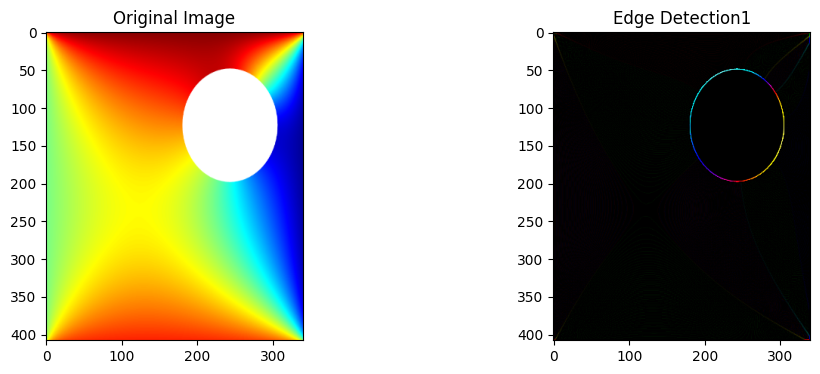

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import files  # Import the files module

# Load and resize the image
image1 = cv2.imread('/content/TemperatureProfile_4.png')
new_width = 512
new_height = 512
resized_image = cv2.resize(image1, (new_width, new_height))
x_left, x_right, y_left, y_right = 60, 400, 40, 448
image = resized_image[y_left:y_right, x_left:x_right]

# Dictionary of kernels
kernels = {
    'Edge Detection1': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
}

# Iterate through the dictionary of kernels and apply each one
for description, kernel in kernels.items():
    # Apply the convolution
    feature_map = cv2.filter2D(image, -1, kernel)

    # Display the original image and feature map side by side
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(description)
    plt.imshow(feature_map, cmap='gray')

    plt.show()

    # Save the images
    cv2.imwrite(f'/content/Input_Image_{description}.png', image)
    cv2.imwrite(f'/content/Output_Image_{description}.png', feature_map)

    # Download the images
    files.download(f'/content/Input_Image_{description}.png')
    files.download(f'/content/Output_Image_{description}.png')


Edge detection on rectangle crack color image

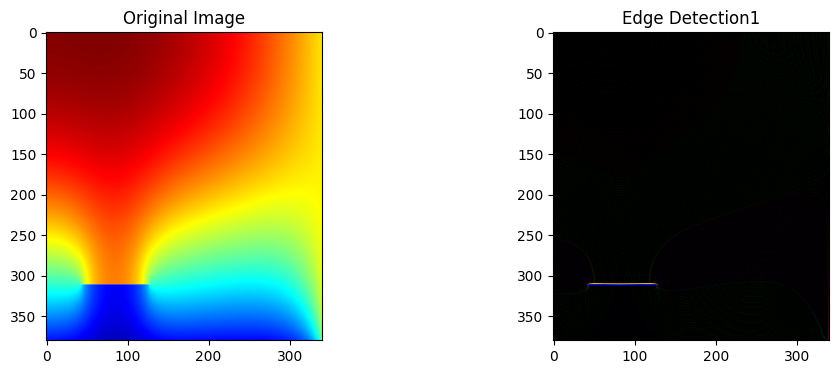

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import files  # Import the files module

# Load and resize the image
image1 = cv2.imread('/content/TemperatureProfile_47.png')
new_width = 512
new_height = 512
resized_image = cv2.resize(image1, (new_width, new_height))
x_left, x_right, y_left, y_right = 60, 400, 40, 420
image = resized_image[y_left:y_right, x_left:x_right]

# Dictionary of kernels
kernels = {
    'Edge Detection1': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
}

# Iterate through the dictionary of kernels and apply each one
for description, kernel in kernels.items():
    # Apply the convolution
    feature_map = cv2.filter2D(image, -1, kernel)

    # Display the original image and feature map side by side
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(description)
    plt.imshow(feature_map, cmap='gray')

    plt.show()

    # Save the images
    cv2.imwrite(f'/content/Input_Image_{description}.png', image)
    cv2.imwrite(f'/content/Output_Image_{description}.png', feature_map)

    # Download the images
    files.download(f'/content/Input_Image_{description}.png')
    files.download(f'/content/Output_Image_{description}.png')


Edge detection on crack image grayscale

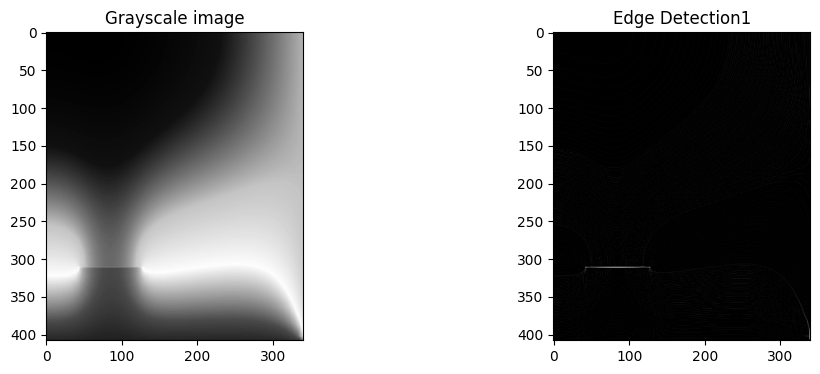

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# Load the image and convert it to grayscale
# Load and resize the image
image1 = cv2.imread('/content/TemperatureProfile_47.png')
new_width = 512
new_height = 512
resized_image = cv2.resize(image1, (new_width, new_height))
x_left, x_right, y_left, y_right = 60, 400, 40, 448
image = resized_image[y_left:y_right, x_left:x_right]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernels = {
    'Edge Detection1': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    # 'Edge Detection1 (Inverted)': np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]]),
    # 'Edge Detection2': np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
    # 'Sharpening': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    # 'Emboss': np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]),
    # 'Sharpen' : np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    # Add more kernels with descriptions here
}


# Iterate through the dictionary of kernels and apply each one
for description, kernel in kernels.items():
    # Apply the convolution
    feature_map = cv2.filter2D(gray, -1, kernel)

    # Display the original image and feature map side by side
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title('Grayscale image')
    plt.imshow(gray, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(description)
    plt.imshow(feature_map, cmap='gray')

    plt.show()

    cv2.imwrite(f'/content/Input_Image_{description}.png', gray)
    cv2.imwrite(f'/content/Output_Image_{description}.png', feature_map)

    # Download the images
    files.download(f'/content/Input_Image_{description}.png')
    files.download(f'/content/Output_Image_{description}.png')


Testing on image taken from the FLYD-C Dataset

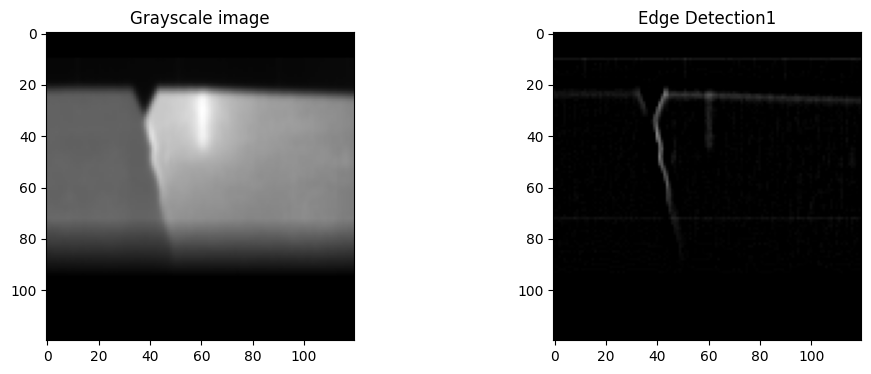

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# Load the image and convert it to grayscale
# Load and resize the image
image1 = cv2.imread('/content/flyd1.png')
# new_width = 512
# new_height = 512
# resized_image = cv2.resize(image1, (new_width, new_height))
# x_left, x_right, y_left, y_right = 60, 400, 40, 448
# image = resized_image[y_left:y_right, x_left:x_right]
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernels = {
    'Edge Detection1': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    # 'Edge Detection1 (Inverted)': np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]]),
    # 'Edge Detection2': np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
    # 'Sharpening': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    # 'Emboss': np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]),
    # 'Sharpen' : np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    # Add more kernels with descriptions here
}


# Iterate through the dictionary of kernels and apply each one
for description, kernel in kernels.items():
    # Apply the convolution
    feature_map = cv2.filter2D(image1, -1, kernel)

    # Display the original image and feature map side by side
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title('Grayscale image')
    plt.imshow(image1, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(description)
    plt.imshow(feature_map, cmap='gray')

    plt.show()